Завдання 6. Варіант 1

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [10]:
np.random.seed(0)
m = 100

In [11]:
X = 6 * np.random.rand(m, 1) - 5
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [12]:
# Функція для побудови кривих
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='val')
    plt.legend()
    plt.show()

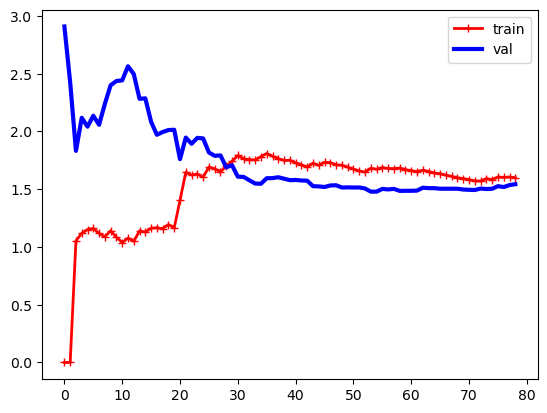

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

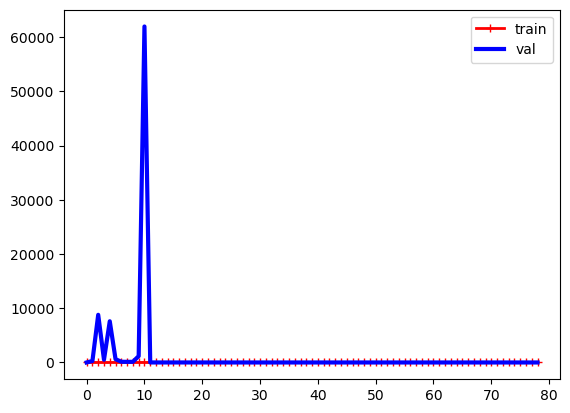

In [14]:
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())])
plot_learning_curves(poly_reg, X, y)